In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features = pd.read_csv('data/dengue_features_train.csv')
labels = pd.read_csv('data/dengue_labels_train.csv')
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
X = features.copy()
y = labels.copy()
X['week_start_date']= pd.to_datetime(X['week_start_date'], format='%Y-%m-%d')
X['total_cases'] = y['total_cases']


1456


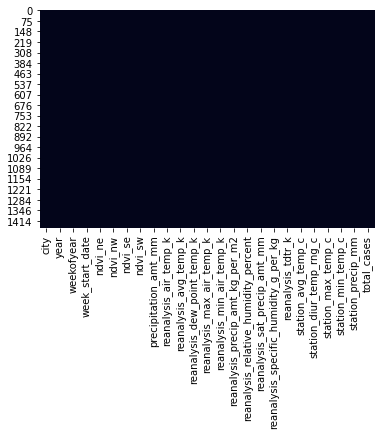

In [8]:
# Traitement NaN
X = X.dropna(axis=0)
sns.heatmap(X.isna(),cbar=False)

In [5]:
#Dataframe "sj" San Juan
X_sj = X[X['city']=='sj']
X_iq = X[X['city']=='iq']

X_sj = X_sj.drop(['city'], axis=1)
X_iq = X_iq.drop(['city'], axis=1)

# WARNING : date vs normalisation ( peut etre renmplacer par le 'weekofyear')
X_sj = X_sj.drop(['week_start_date'], axis=1)
X_iq = X_iq.drop(['week_start_date'], axis=1)

y_sj = X_sj['total_cases']
y_iq = X_iq['total_cases']

X_sj = X_sj.drop(['total_cases'], axis=1)

In [6]:
X_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
#Standardisation des features
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_sj)
X_sj_scale = std_scale.transform(X_sj) #contient nos données normalisés

In [8]:
# Séparation train et test
from sklearn.model_selection import train_test_split
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X_sj_scale, y_sj, test_size=0.25)

In [9]:
print(X_sj_scale.shape)
print(X_sj_train.shape)
print(X_sj_test.shape) #25%

(727, 22)
(545, 22)
(182, 22)


## Regression linearaire classique
Notre "Base line" pour la comparer au prochaine regression qui seront "regularisé"

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(X_sj_train,y_sj_train)
lr_pred = lr.predict(X_sj_test)

In [11]:
baseline_mse = mean_squared_error(y_sj_test, lr_pred) #np.mean((lr_pred - y_sj_test) ** 2)
print(baseline_mse)

1087.8570783809512


In [12]:
baseline_mae = mean_absolute_error(y_sj_test, lr_pred)
print(baseline_mae)

18.460433715997308


## Regression Ridge

<AxesSubplot:>

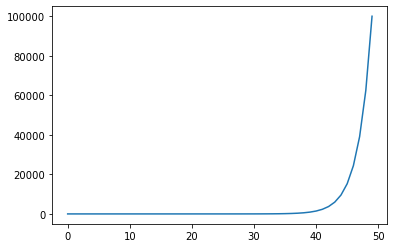

In [13]:
#hyperparametre de régularisation
n_alphas = 50
# alpha sur une echelle logarithmique entre 10^-5 et 10^5
alphas = np.logspace(-5,5,50)
sns.lineplot(x=range(50), y=alphas)

In [14]:
ridge = linear_model.Ridge()
coefs=[]
errors_mse=[]
errors_mae=[]

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_sj_train,y_sj_train)#entrainement
    ridge_pred = ridge.predict(X_sj_test)
    coefs.append(ridge.coef_)#Tableau de coefficient associé a chaque variable de X
    errors_mse.append(mean_squared_error(y_sj_test, ridge_pred))#Tableau d'erreur MSE
    errors_mae.append(mean_absolute_error(y_sj_test, ridge_pred))#Tableau d'erreur MAE

In [15]:
#print(coefs)
#print(errors_mse)
print(errors_mae)

[18.46044908517487, 18.4604583008087, 18.46047303875092, 18.460496602619596, 18.46053426374878, 18.46059441982431, 18.460690414957227, 18.460843366487293, 18.461086473377893, 18.461471375560034, 18.46207701999512, 18.463020721151572, 18.464468706237753, 18.466637734632272, 18.469768851199916, 18.474041900174697, 18.479401978298792, 18.485319776608723, 18.490611243078796, 18.495532914148974, 18.49883821361691, 18.499900256176822, 18.493769381865288, 18.48506037445629, 18.471414605381117, 18.484567301357036, 18.517103204065958, 18.580777427202296, 18.644301857447818, 18.72835320545231, 18.819725353305156, 18.936489826769574, 19.05645520938307, 19.163379667552103, 19.282922935610262, 19.427498197264658, 19.594202837641607, 19.74559345111592, 19.910154073409505, 20.090614621320764, 20.27058237059281, 20.48437953435002, 20.768946517628272, 21.120938280679756, 21.48870879688889, 21.82599967533821, 22.09830001878815, 22.29912123479335, 22.440001572285905, 22.53542699355975]


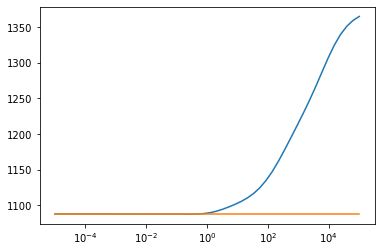

In [16]:
ax = plt.gca()
ax.plot(alphas,errors_mse,  [10**-5, 10**5], [baseline_mse,baseline_mse])
ax.set_xscale('log')
plt.show()

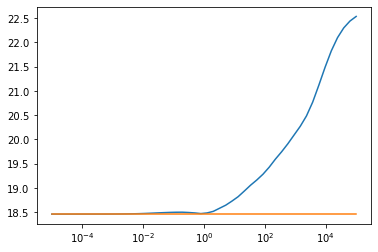

In [17]:
ax_mae = plt.gca()
ax_mae.plot(alphas,errors_mae,  [10**-5, 10**5], [baseline_mae,baseline_mae])
ax_mae.set_xscale('log')
plt.show()

In [18]:
print('alpha: ',alphas[np.argmin(errors_mse)],'\nRidge_mse:',np.min(errors_mse),'\nLR_mse:', baseline_mse)

alpha:  0.30888435964774846 
Ridge_mse: 1087.6263981394554 
LR_mse: 1087.8570783809512


In [19]:
print('alpha: ',alphas[np.argmin(errors_mae)],'\nRidge_mae:',np.min(errors_mae),'\nLR_mae:', baseline_mae)

alpha:  1e-05 
Ridge_mae: 18.46044908517487 
LR_mae: 18.460433715997308


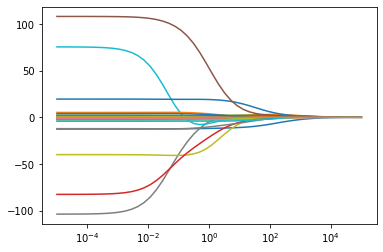

In [20]:
#Chemin de régularisation
ax_cr = plt.gca()
ax_cr.plot(alphas,coefs)
ax_cr.set_xscale('log')
plt.show()
#les parametres evoluent en fct du coefficient de regularisation
#groupement de variable au centre qui doivent etre correlé, qui ont été regroupé par les coefficient


## Regression Lasso

In [21]:
#hyperparametre de régularisation ou régulation??
n_alphas = 50
# alpha sur une echelle logarithmique entre 10^-5 et 10^5
alphas = np.logspace(-1,5,50)

In [22]:
lasso = linear_model.Lasso()
lasso_coefs=[]
lasso_errors_mse=[]
lasso_errors_mae=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_sj_train,y_sj_train)#entrainement
    lasso_pred = lasso.predict(X_sj_test)
    lasso_coefs.append(lasso.coef_)#Tableau de coefficient associé a chaque variable de X
    lasso_errors_mse.append(mean_squared_error(y_sj_test, lasso_pred))#Tableau d'erreur MSE
    lasso_errors_mae.append(mean_absolute_error(y_sj_test, lasso_pred))#Tableau d'erreur MAE

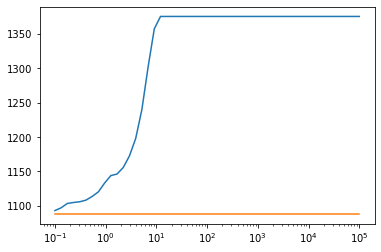

In [23]:
ax = plt.gca()
ax.plot(alphas,lasso_errors_mse,  [10**-1, 10**5], [baseline_mse,baseline_mse])
ax.set_xscale('log')
plt.show()

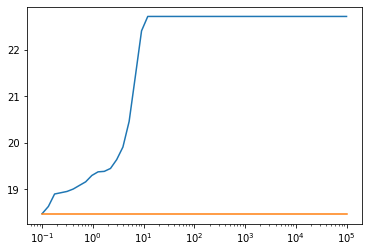

In [24]:
ax_mae = plt.gca()
ax_mae.plot(alphas,lasso_errors_mae,  [10**-1, 10**5], [baseline_mae,baseline_mae])
ax_mae.set_xscale('log')
plt.show()

In [25]:
print('alpha: ',alphas[np.argmin(lasso_errors_mse)],'\nLasso_mse:',np.min(lasso_errors_mse),'\nLR_mse:', baseline_mse)

alpha:  0.1 
Lasso_mse: 1093.015972724826 
LR_mse: 1087.8570783809512


In [26]:
print('alpha: ',alphas[np.argmin(lasso_errors_mae)],'\nLasso_mae:',np.min(lasso_errors_mae),'\nLR_mae:', baseline_mae)

alpha:  0.1 
Lasso_mae: 18.470725854744664 
LR_mae: 18.460433715997308


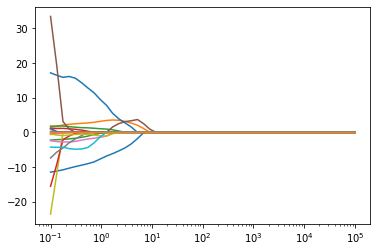

In [27]:
#Chemin de régularisation
ax_cr = plt.gca()
ax_cr.plot(alphas,lasso_coefs)
ax_cr.set_xscale('log')
plt.show()
#Lasso elimine les variable qui ne l'interesse pas...(qui sont corrélé entre elle)
#effet de selection de variable du Lasso

In [28]:
#faire une CrossValidation
#utiliser RidgeCv et LassoCv pour selectionner les hyperparametre optimaux

## Regression Elastic Net

In [29]:
#hyperparametre de régularisation ou régulation??
n_alphas = 50
# alpha sur une echelle logarithmique entre 10^-5 et 10^5
alphas = np.logspace(-1,5,50)

In [30]:
en = linear_model.Lasso()
en_coefs=[]
en_errors_mse=[]
en_errors_mae=[]

for a in alphas:
    en.set_params(alpha=a)
    en.fit(X_sj_train,y_sj_train)#entrainement
    en_pred = en.predict(X_sj_test)
    en_coefs.append(en.coef_)#Tableau de coefficient associé a chaque variable de X
    en_errors_mse.append(mean_squared_error(y_sj_test, en_pred))#Tableau d'erreur MSE
    en_errors_mae.append(mean_absolute_error(y_sj_test, en_pred))#Tableau d'erreur MAE

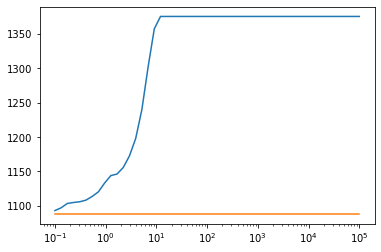

In [31]:
ax = plt.gca()
ax.plot(alphas,en_errors_mse,  [10**-1, 10**5], [baseline_mse,baseline_mse])
ax.set_xscale('log')
plt.show()

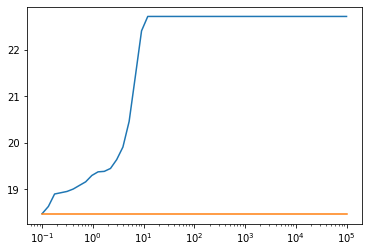

In [32]:
ax_mae = plt.gca()
ax_mae.plot(alphas,en_errors_mae,  [10**-1, 10**5], [baseline_mae,baseline_mae])
ax_mae.set_xscale('log')
plt.show()

In [33]:
print('alpha: ',alphas[np.argmin(en_errors_mse)],'\nen_mse:',np.min(en_errors_mse),'\nLR_mse:', baseline_mse)

alpha:  0.1 
en_mse: 1093.015972724826 
LR_mse: 1087.8570783809512


In [34]:
print('alpha: ',alphas[np.argmin(en_errors_mae)],'\nen_mae:',np.min(en_errors_mae),'\nLR_mae:', baseline_mae)

alpha:  0.1 
en_mae: 18.470725854744664 
LR_mae: 18.460433715997308


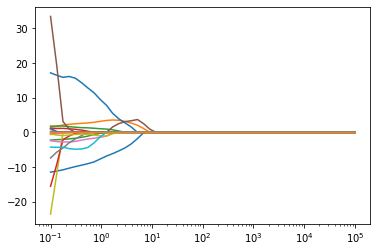

In [35]:
#Chemin de régularisation
ax_cr = plt.gca()
ax_cr.plot(alphas,en_coefs)
ax_cr.set_xscale('log')
plt.show()
#Lasso elimine les variable qui ne l'interesse pas...(qui sont corrélé entre elle)
#effet de selection de variable du Lasso

In [36]:
#LinearSVR

# Evaluation et amélioration des performance (modèle linéaire)
- Eviter le sur-apprentissage (apprend bien mais n'arrive pas a generaliser... inefficace sur de nouvelle données)
- Choisir une ou plusieurs mesures de la performance d'un algorithme d'apprentissage supervisé, adaptées à la question posée

- Mettre en place une procédure de validation qui réduise le risque de sur-apprentissage (séparation du jeu d'apprentissage et de validation, validation croisée)

- Mettre en place une procédure de grille de recherche (grid search) pour choisir les hyperparamètres d'un algorithme

### Ce qui fait un bon modèle d’apprentissage
- En apprentissage supervisé, le but est de produire des modèles qui généralisent, c’est-à-dire qui sont capables de faire de bonnes prédictions sur de nouvelles données

- De bonnes performances sur le jeu d’entraînement ne garantissent pas que le modèle sera capable de généraliser !

- On cherche à développer un modèle qui soit suffisamment complexe pour bien capturer la nature des données (et éviter ainsi le sous-apprentissage), mais suffisamment simple pour éviter le sur-apprentissage.

- Attention aux contraintes de temps de calcul et aux ressources en mémoire !

### Mettez en place un cadre de validation croisée
- Il ne faut jamais évaluer un modèle sur des points qui ont été utilisés pour l’entraîner.

- On sépare donc les données entre un jeu d’entraînement, sur lequel on apprend le modèle, et un jeu de test, sur lequel on l’évalue.

- Pour utiliser l’intégralité de nos données pour entraîner et pour tester, et pour éviter un biais potentiel lié au fait de faire une évaluation unique, on préfère faire une validation croisée.

- Dans le cas d’un problème de classification, on fait attention à stratifier la validation croisée pour éviter d’introduire des biais.

### Évaluez un algorithme de régression
Pour évaluer un modèle de régression, on peut calculer la distance entre valeurs prédites et vraies valeurs. Cela nous donne :

- la somme des carrés des résidus (RSS) ;

- la moyenne de cette somme (MSE) ;

- la racine carrée de cette moyenne (RMSE).

On peut préférer calculer la corrélation entre valeurs prédites et vraies valeurs :

- l'erreur carrée relative (RSE) est la RSS normalisée par la somme des carrés des distances entre les étiquettes et leur moyenne ;

- elle est le complément à 1 du coefficient de détermination (R2), qui est le carré de la corrélation de Pearson entre valeurs prédites et vraies valeurs.

In [37]:
X_sj.dtypes

year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c  

In [38]:
y_sj.shape

(727,)

In [39]:
X_sj.shape

(727, 22)

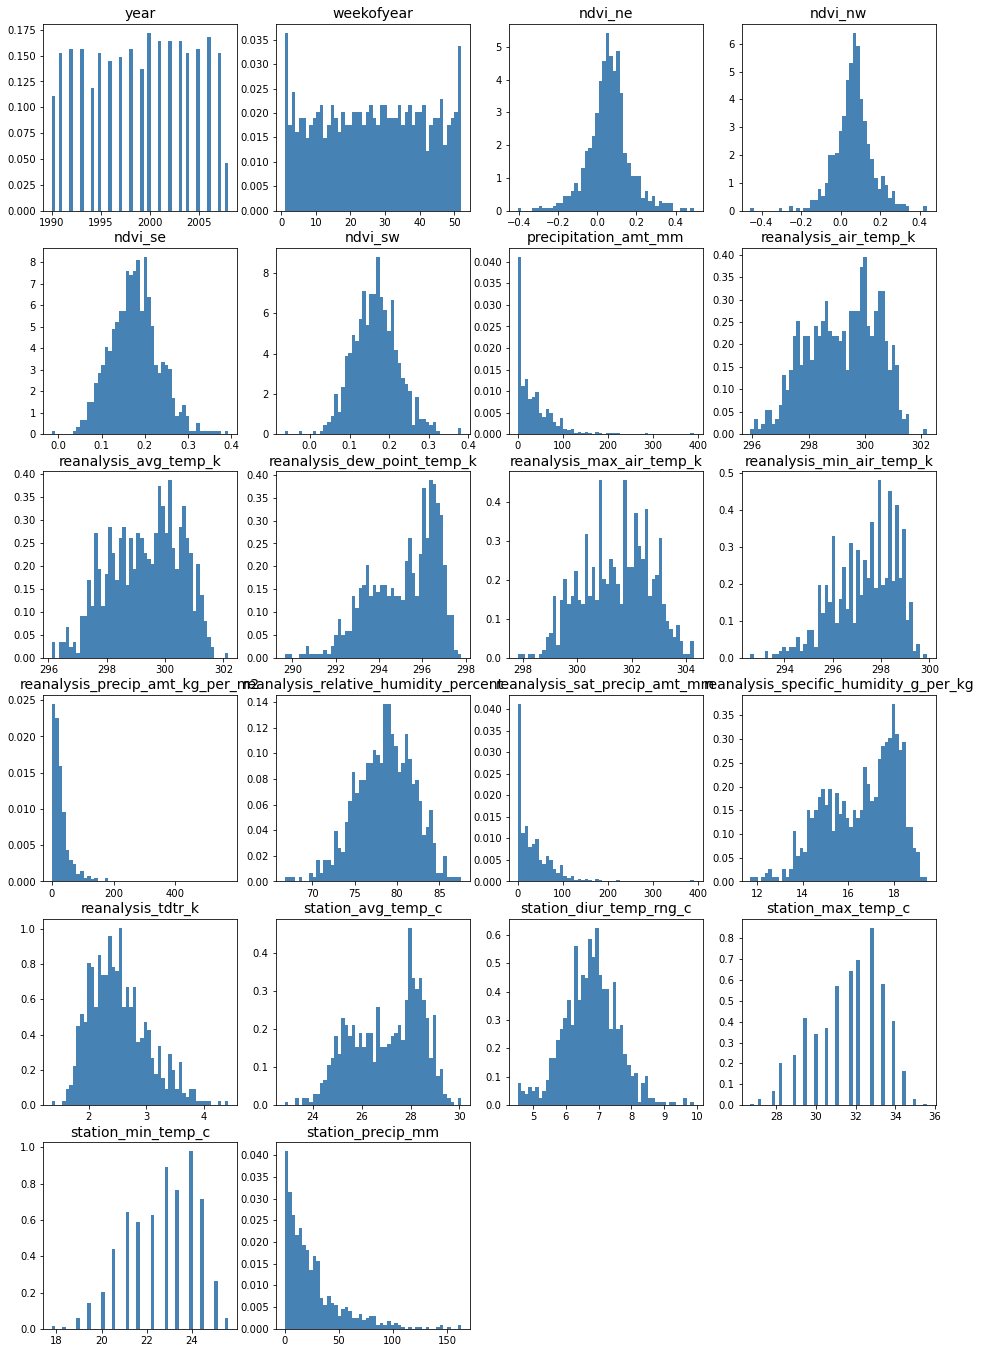

In [41]:
fig= plt.figure(figsize=(16,24))
for feat_idx in range(X_sj.shape[1]):
    ax=fig.add_subplot(6,4,(feat_idx+1))
    h = ax.hist(X_sj.iloc[:,feat_idx], bins=50, color='steelblue', edgecolor='none', density= True)
    ax.set_title(X_sj.columns[feat_idx], fontsize=14)
#histogramme normed? density? seaborn
#certaine sont normalement distribué
#x varie parfois [0: 0.5] ou [0:400] =>standardiser, sinon valeur trop grand prendront le pas sur les autre variable

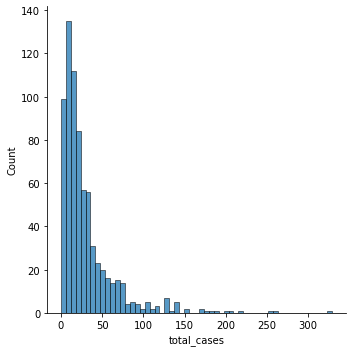

In [42]:
sns.displot(data=y_sj)

In [43]:
X1_sj_train, X1_sj_test, y1_sj_train, y1_sj_test = train_test_split(X_sj_scale, y_sj, test_size=0.3)

In [44]:
#standardisation

#Standardiseur
std_scale = preprocessing.StandardScaler().fit(X1_sj_train)
X1_sj_train_std = std_scale.transform(X1_sj_train)
X1_sj_test_std = std_scale.transform(X1_sj_test)

X1_sj_train_std= pd.DataFrame(data=X1_sj_train_std, columns=X_sj.columns)
X1_sj_test_std= pd.DataFrame(data=X1_sj_test_std, columns=X_sj.columns)


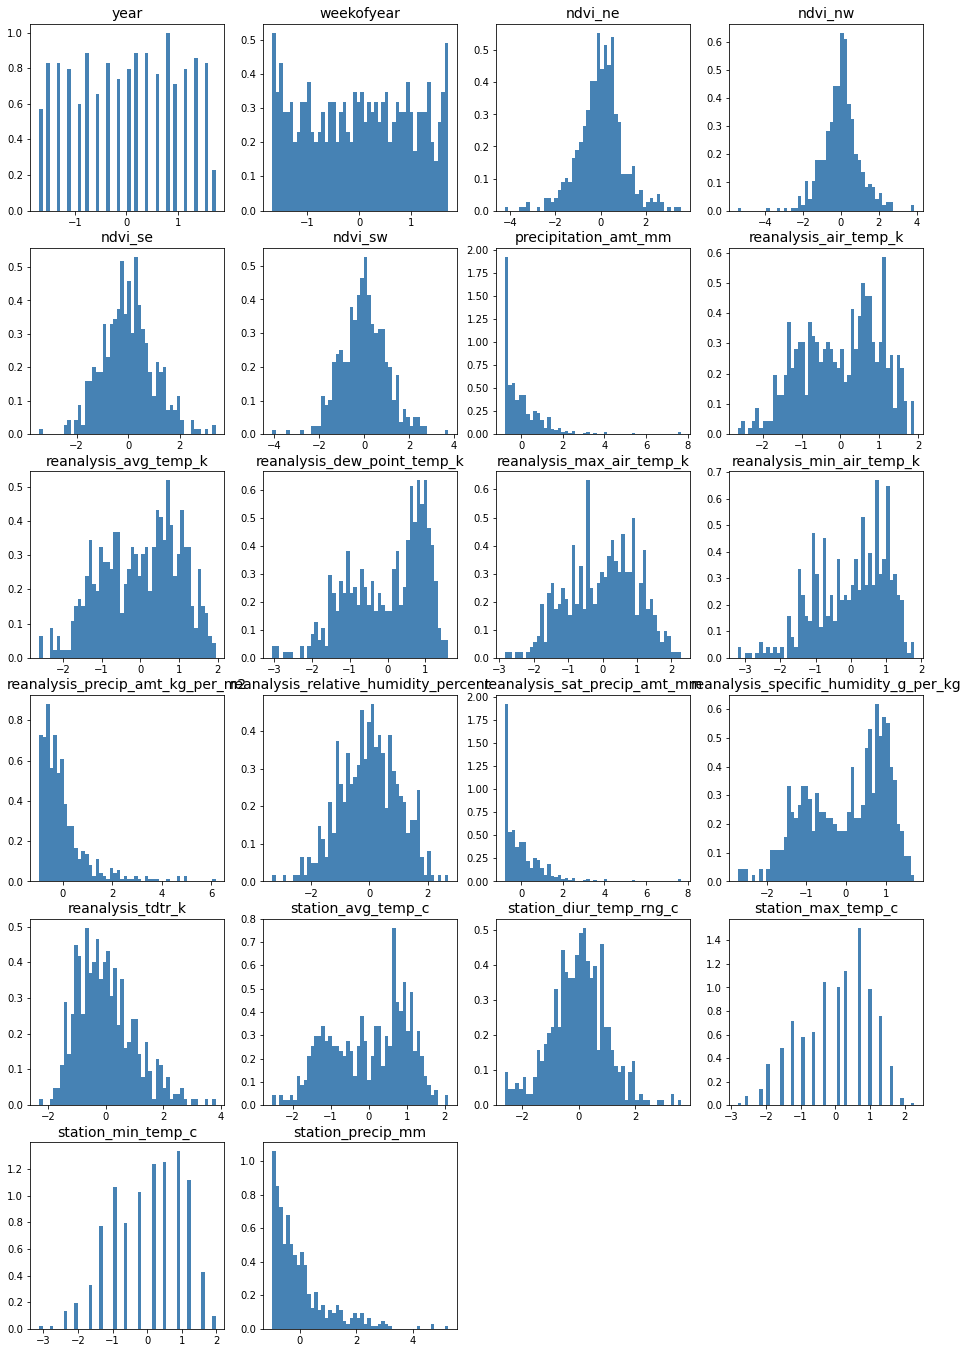

In [46]:
fig= plt.figure(figsize=(16,24))
for feat_idx in range(X_sj.shape[1]):
    ax=fig.add_subplot(6,4,(feat_idx+1))
    h = ax.hist(X1_sj_train_std.iloc[:,feat_idx], bins=50, color='steelblue', edgecolor='none', density= True)
    ax.set_title(X1_sj_train_std.columns[feat_idx], fontsize=14)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [48]:
reg_lr = cross_validate(linear_model.LinearRegression(), X1_sj_train_std, y1_sj_train, cv=5, scoring='neg_mean_absolute_error')

In [49]:
reg_lr['test_score']

array([-20.8193343 , -20.44864541, -20.5526309 , -22.76448527,
       -22.44698133])

In [50]:
reg = GridSearchCV(linear_model.Ridge(),
                  {'alpha':np.linspace(0.0000001,1000000,1000)}, 
                   cv=5,
                   scoring='neg_mean_absolute_error'
                  )

In [51]:
reg.fit(X1_sj_train_std, y1_sj_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-07, 1.00100100e+03, 2.00200200e+03, 3.00300300e+03,
       4.00400400e+03, 5.00500501e+03, 6.00600601e+03, 7.00700701e+03,
       8.00800801e+03, 9.00900901e+03, 1.00100100e+04, 1.10110110e+04,
       1.20120120e+04, 1.30130130e+04, 1.40140140e+04, 1.50150150e+04,
       1.60160160e+04, 1.70170170e+04, 1.80180180e+04, 1....
       9.76976977e+05, 9.77977978e+05, 9.78978979e+05, 9.79979980e+05,
       9.80980981e+05, 9.81981982e+05, 9.82982983e+05, 9.83983984e+05,
       9.84984985e+05, 9.85985986e+05, 9.86986987e+05, 9.87987988e+05,
       9.88988989e+05, 9.89989990e+05, 9.90990991e+05, 9.91991992e+05,
       9.92992993e+05, 9.93993994e+05, 9.94994995e+05, 9.95995996e+05,
       9.96996997e+05, 9.97997998e+05, 9.98998999e+05, 1.00000000e+06])},
             scoring='neg_mean_absolute_error')

In [52]:
#quelle est le meilleur hyper_param selectionner?

print(reg.best_params_)
print(reg.best_score_)

{'alpha': 1e-07}
-21.40641500819108


In [53]:
y_pred = reg.predict(X1_sj_test_std)

In [54]:
print(mean_absolute_error(y1_sj_test, y_pred))

21.301617886005612


In [55]:
# lasso
reg_lasso = GridSearchCV(linear_model.Lasso(),
                  {'alpha':np.linspace(0.0000001,100000,1000)}, 
                   cv=5,
                   scoring='neg_mean_absolute_error'
                  )

In [56]:
reg_lasso.fit(X1_sj_train_std, y1_sj_train)

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202571.9185495558, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238699.19980221926, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232534.83963334735, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-07, 1.00100100e+02, 2.00200200e+02, 3.00300300e+02,
       4.00400401e+02, 5.00500501e+02, 6.00600601e+02, 7.00700701e+02,
       8.00800801e+02, 9.00900901e+02, 1.00100100e+03, 1.10110110e+03,
       1.20120120e+03, 1.30130130e+03, 1.40140140e+03, 1.50150150e+03,
       1.60160160e+03, 1.70170170e+03, 1.80180180e+03, 1....
       9.76976977e+04, 9.77977978e+04, 9.78978979e+04, 9.79979980e+04,
       9.80980981e+04, 9.81981982e+04, 9.82982983e+04, 9.83983984e+04,
       9.84984985e+04, 9.85985986e+04, 9.86986987e+04, 9.87987988e+04,
       9.88988989e+04, 9.89989990e+04, 9.90990991e+04, 9.91991992e+04,
       9.92992993e+04, 9.93993994e+04, 9.94994995e+04, 9.95995996e+04,
       9.96996997e+04, 9.97997998e+04, 9.98998999e+04, 1.00000000e+05])},
             scoring='neg_mean_absolute_error')

In [57]:
#quelle est le meilleur hyper_param selectionner?

print(reg_lasso.best_params_)
print(reg_lasso.best_score_)

{'alpha': 1e-07}
-21.248064916016556


In [58]:
y_pred = reg_lasso.predict(X1_sj_test_std)
print(mean_absolute_error(y1_sj_test, y_pred))

21.186932468288873


In [76]:
# ElasticNet
reg_en = GridSearchCV(linear_model.ElasticNet(),
                  {
                      'alpha':np.linspace(0.0001,10,100),
                      'l1_ratio':np.linspace(0,1,10)
                  }, 
                   cv=5,
                   scoring='neg_mean_absolute_error'
                  )

In [77]:
reg_en.fit(X1_sj_train_std, y1_sj_train)

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202728.4269896987, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239359.43920907608, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233186.39625232643, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201035.84894446738, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238122.1808037527, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232028.71295927267, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246281.27990534264, tolerance: 58.46584029484029
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218530.68491405525, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262041.03379300225, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergen

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225273.1051858925, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269984.1891682429, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267406.27737858705, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228816.9959194163, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274098.24173294666, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271400.82171654527, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231312.84492947123, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276945.4202669922, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274151.7637656232, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233258.2817662771, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279140.8276507295, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276279.48862027196, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234854.59955484283, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280931.21803759795, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278022.6532122391, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236205.81819714466, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282441.74996517086, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279499.9453578156, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237373.82565441792, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283745.4659136251, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280780.0565431907, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238398.96430385186, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284889.18059027067, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281906.9202922809, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239309.25920102885, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285904.96738853987, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282910.67567043303, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240125.10721445736, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286815.91515169054, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283813.08689110604, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240861.88853768504, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287639.2872265042, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284630.491930906, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241531.52674734293, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288388.3814948691, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285375.53022421675, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242143.47375426922, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289073.68899539445, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286058.2165168712, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242705.36008127453, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289703.6496152255, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286686.64111290156, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243223.44027086455, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290285.1641732553, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287267.4449378933, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243702.90748791862, tolerance: 51.332769704433495
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290823.9527590675, tolerance: 61.14089384236453
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287806.1526786558, tolerance: 60.5635960591133
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilyass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-04, 1.01109091e-01, 2.02118182e-01, 3.03127273e-01,
       4.04136364e-01, 5.05145455e-01, 6.06154545e-01, 7.07163636e-01,
       8.08172727e-01, 9.09181818e-01, 1.01019091e+00, 1.11120000e+00,
       1.21220909e+00, 1.31321818e+00, 1.41422727e+00, 1.51523636e+00,
       1.61624545e+00, 1.71725455e+00, 1.81826364e+...
       8.48486364e+00, 8.58587273e+00, 8.68688182e+00, 8.78789091e+00,
       8.88890000e+00, 8.98990909e+00, 9.09091818e+00, 9.19192727e+00,
       9.29293636e+00, 9.39394545e+00, 9.49495455e+00, 9.59596364e+00,
       9.69697273e+00, 9.79798182e+00, 9.89899091e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='neg_mean_absolute_error')

In [78]:
#quelle est le meilleur hyper_param selectionner?

print(reg_en.best_params_)
print(reg_en.best_score_)

{'alpha': 0.9091818181818182, 'l1_ratio': 1.0}
-21.202503781246314


## les approches naives

- Les performances d'un modèle dépendent du jeu de données.

- Les approches naïves sont des approches simples qui n'apprennent pas vraiment mais servent de point de comparaison pour évaluer nos modèles.

Dans le cas d'algorithmes de régression, on pourra envisager les deux approches naïves suivantes :

- Un modèle qui « prédit » **une valeur aléatoire**, uniformément entre la plus petite et la plus grande des étiquettes du jeu d'entraînement.

- Un modèle qui retourne toujours **la même valeur**, par exemple la moyenne ou la médiane des étiquettes du jeu d'entraînement.

In [79]:
# KNeighborsRegressor(n_neighbors=11)
from sklearn import neighbors

In [80]:
knn = GridSearchCV(neighbors.KNeighborsRegressor(),
                  {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}, 
                   cv=5,
                   scoring='neg_mean_absolute_error')

In [81]:
knn.fit(X_sj_train, y_sj_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [82]:
#quelle est le meilleur hyper_param selectionner?

print(knn.best_params_)
print(knn.best_score_)

{'n_neighbors': 7}
-20.67155963302752


In [83]:
y_pred = knn.predict(X_sj_test)

In [84]:
mean_absolute_error(y_sj_test, y_pred)

17.76452119309262

In [85]:
#pair valeur reel /valeur predite
sizes= {}
for (yt,yp) in zip(list(y_sj_test),list(y_pred)):
    if (yt,yp) in sizes:
        sizes[(yt,yp)] +=1
    else:
        sizes[(yt,yp)] =1

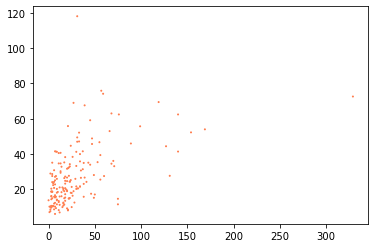

In [86]:
keys = sizes.keys()
plt.scatter(
    [k[0] for k in keys],
    [k[1] for k in keys],
    s=[sizes[k] for k in keys],
    color='coral'  
           )

In [87]:
#1er approche naive : valeur aleatoire
y_pred_random = np.random.randint(
    np.min(y_sj_train),
    np.max(y_sj_train),
    y_sj_test.shape)

In [88]:
mean_absolute_error(y_sj_test, y_pred_random)# KNN meilleur que approche aleatoire

111.3021978021978

In [89]:
#pair valeur reel /valeur predite
sizes_random= {}
for (yt,yp) in zip(list(y_sj_test),list(y_pred_random)):
    if (yt,yp) in sizes_random:
        sizes_random[(yt,yp)] +=1
    else:
        sizes_random[(yt,yp)] =1

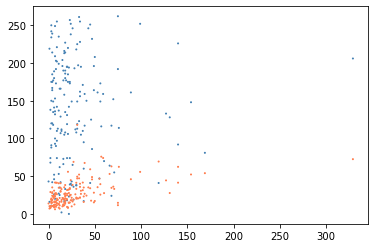

In [90]:
keys = sizes_random.keys()
plt.scatter(
    [k[0] for k in keys],
    [k[1] for k in keys],
    s=[sizes_random[k] for k in keys],
    color='steelblue'  
           )

keys = sizes.keys()
plt.scatter(
    [k[0] for k in keys],
    [k[1] for k in keys],
    s=[sizes[k] for k in keys],
    color='coral'  
           )

In [91]:
#prédir la moyenne des valeur dans le jeu de données
from sklearn import dummy

In [92]:
dum = dummy.DummyRegressor(strategy='mean')

In [93]:
dum.fit(X_sj_train, y_sj_train)

DummyRegressor()

In [94]:
y_pred_dum = dum.predict(X_sj_test)
y_pred_dum

array([30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57431193,
       30.57431193, 30.57431193, 30.57431193, 30.57431193, 30.57

In [95]:
mean_absolute_error(y_sj_test, y_pred_dum)# KNN meilleur que approche aleatoire

22.716211311624157